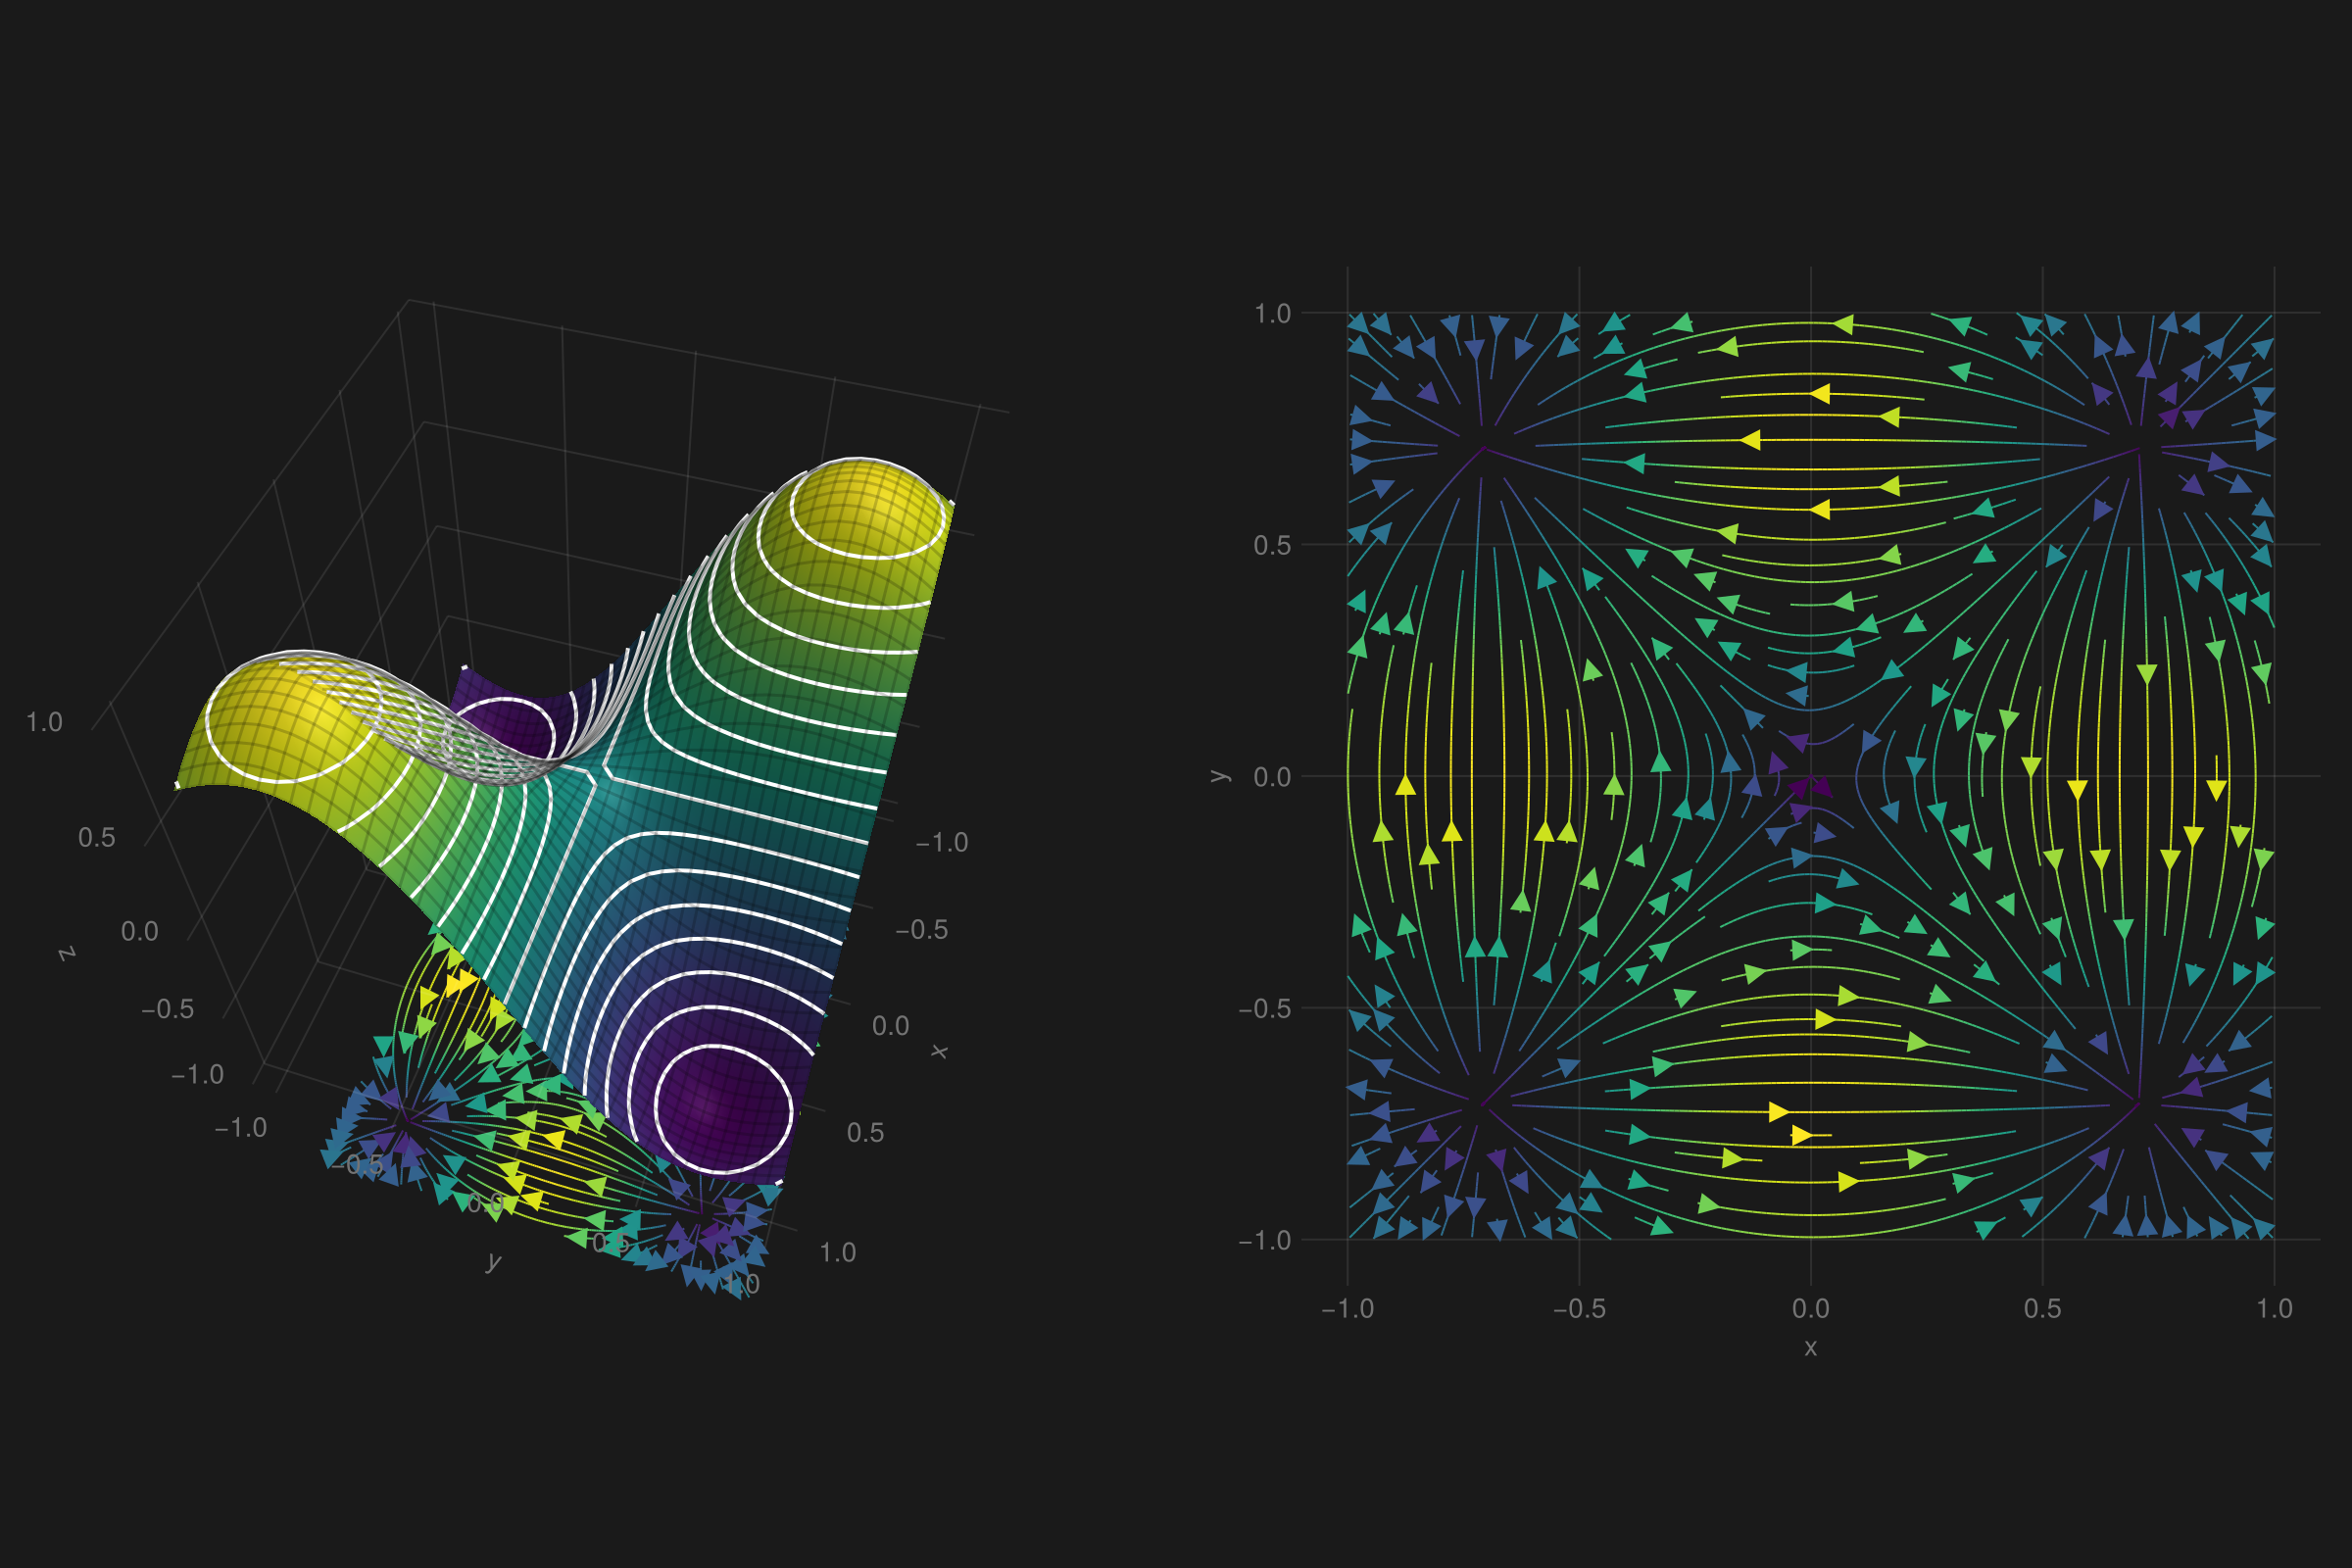

In [1]:
# example modified from  mthelm85
using CairoMakie, ForwardDiff
CairoMakie.activate!()
Makie.inline!(true)
f(x, y) = -5 * x * y * exp(-x^2 - y^2)
x = y = -1:0.05:1.0
z = [f(i, j) for i in x, j in y];
# This is the same function as above, just modified so that it will
# work with ForwardDiff
g(x, y) = [-5 * x * y * exp(-x^2 - y^2)]
J(xx, yy) = ForwardDiff.jacobian(x -> g(x[1], x[2]), [xx, yy])
field(i, j) = Point2f(J(i, j)[1], J(i, j)[2])

zmin, zmax = minimum(z), maximum(z)
cmap = :viridis
function plot()
    fig = Figure(size = (1200, 800))
    ax1 = Axis3(fig[1, 1], aspect = (1, 1, 1), perspectiveness = 0.5,
        elevation = π / 3.5, azimuth = 0.1π,)
    ax2 = Axis(fig[1, 2], aspect = DataAspect(), xlabel = "x", ylabel = "y")
    surface!(ax1, x, y, z; colormap = cmap, colorrange = (zmin, zmax),
        transparency = true)
    contour3d!(ax1, x, y, z .+ 0.005; levels = 15, linewidth = 2, color = :white,
        transparency = true)
    wireframe!(ax1, x, y, z; color = (:black, 0.1),
        transparency = true)
    streamplot!(ax1, field, -1 .. 1, -1 .. 1; colormap = cmap, gridsize = (40, 40),
        arrow_size = 15, linewidth = 1, transformation = (:xy, -zmax))
    streamplot!(ax2, field, -1 .. 1, -1 .. 1; colormap = cmap, gridsize = (40, 40),
        arrow_size = 15, linewidth = 1)
    fig
end
fig = with_theme(plot, theme_dark())
fig

In [ ]:
save("../assets/plots/makie-example.png", fig)